In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
#########################
# Augmentation methods
#########################
def noise(data):
    noise_amp = 0.05*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    s_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, s_range)
    
def pitch(data, sample_rate):
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    dyn_change = np.random.uniform(low=-0.5 ,high=7)
    return (data * dyn_change)
    
def speedNpitch(data):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change 
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

Text(0, 0.5, 'Amplitude')

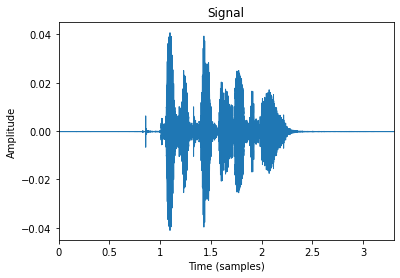

In [48]:
# folder_path = 'D:/MMU/Year 3\Sem 2\FYP1\Python Code\1. Datasets\speech-emotion-recognition-ravdess-data\Actor_01'
file_name = '03-01-01-01-01-01-01.wav'
# path = os.path.join(folder_path,file_name)

y, sr = librosa.load(file_name)
librosa.display.waveplot(y, sr=sr)
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

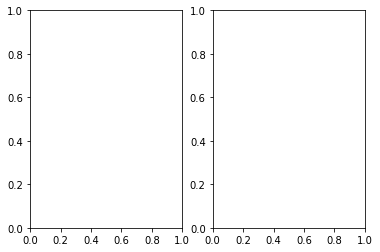

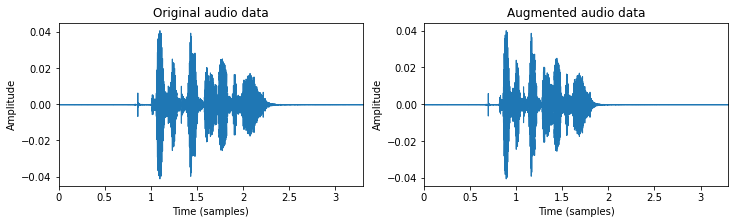

In [49]:
fig = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize=(12,3))

plt.subplot(121)
librosa.display.waveplot(y, sr=sr)
plt.title('Original audio data')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(122)
librosa.display.waveplot(speedNpitch(y), sr=sr)
plt.title('Augmented audio data')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

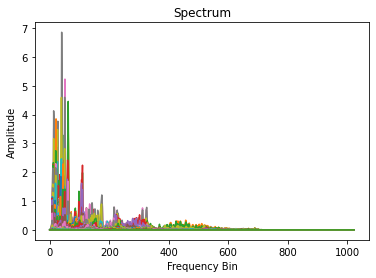

In [3]:
ft = np.abs(librosa.stft(y))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

Text(0.5, 1.0, 'Spectrogram')

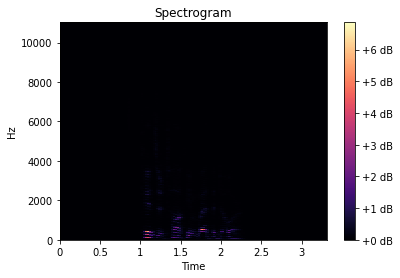

In [4]:
D = np.abs(librosa.stft(y))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

Text(0.5, 1.0, 'Log-Scaled Spectrogram')

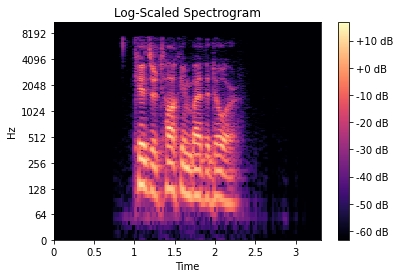

In [7]:
spec = np.abs(librosa.stft(y))
spec = librosa.amplitude_to_db(spec)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Scaled Spectrogram')

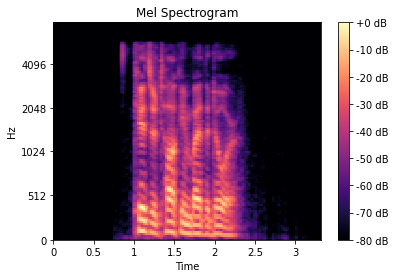

In [6]:
spect = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spect = librosa.power_to_db(spect, ref=np.max)

librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')